In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head(10)
# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first = True)

In [11]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(3,activation = 'relu',input_dim=11))
model.add(Dense(1,activation = 'sigmoid'))

2022-10-11 13:31:57.335826: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Model Compilation phase
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [17]:
history = model.fit(X_train_scaled,y_train,epochs = 50,validation_split = 0.2)

2022-10-11 13:31:57.592852: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.8886 - accuracy: 0.4794 - val_loss: 0.7235 - val_accuracy: 0.5731
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.7008 - val_loss: 0.5673 - val_accuracy: 0.7650
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7970 - val_loss: 0.5105 - val_accuracy: 0.8031
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8100 - val_loss: 0.4791 - val_accuracy: 0.8131
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.8116 - val_loss: 0.4576 - val_accuracy: 0.8100
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8148 - val_loss: 0.4424 - val_accuracy: 0.8144
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8164 - val_loss: 0.4310 - val_accuracy: 0.8138
Epoch 

In [18]:
model.layers[0].get_weights()

[array([[ 0.01343662, -0.0131263 ,  0.04628975],
        [-0.11423957, -0.21295324, -1.2949798 ],
        [-0.04635091, -0.05239826, -0.06139937],
        [ 0.373517  , -0.268828  , -0.07453501],
        [ 1.4564445 , -1.3325841 ,  0.14594847],
        [-0.04955299, -0.0521868 , -0.02826988],
        [-0.45707142, -0.5858551 , -0.41865197],
        [-0.01422667,  0.02204464, -0.00735448],
        [-0.10539365,  0.24595873, -0.0627701 ],
        [ 0.07458849, -0.04987992, -0.08778163],
        [-0.1213087 , -0.06797757,  0.09476203]], dtype=float32),
 array([-0.47923508,  0.26783112,  1.8029464 ], dtype=float32)]

In [19]:
model.layers[1].get_weights()

[array([[ 1.7505711],
        [ 1.5983105],
        [-1.2044713]], dtype=float32),
 array([-1.4740754], dtype=float32)]

In [20]:
y_log = model.predict(X_test_scaled)

In [21]:
y_pred = np.where(y_log>0.5,1,0)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

In [23]:
import matplotlib.pyplot as plt

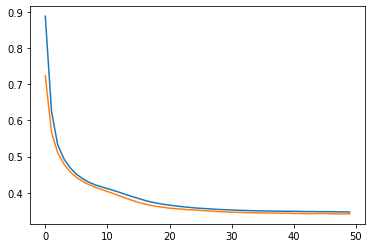

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

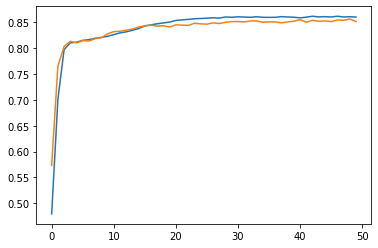

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])